## AAVAIL EDA investigation and visualizations


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from my_modules.data_utils import fetch_data, fetch_ts, engineer_features
from my_modules.plot_utils import create_correlation_grid_plot

%matplotlib inline


In [11]:
DATA_DIR = './data/cs-train'

In [12]:
df_aavail_data = fetch_data(DATA_DIR)

In [13]:
print(df_aavail_data.loc[df_aavail_data.price < 0])
#drop rows with negative price values
indexNames = df_aavail_data[df_aavail_data['price'] < 0].index
df_aavail_data.drop(indexNames, inplace=True)

               country  customer_id  day invoice  month     price stream_id  \
178920  United Kingdom          NaN   26  506401      4 -53594.36         B   
276274  United Kingdom          NaN   16  516228      7 -44031.79         B   
405052  United Kingdom          NaN   17  528059     10 -38925.87         B   

        times_viewed  year invoice_date  
178920             1  2018   2018-04-26  
276274             1  2018   2018-07-16  
405052             1  2018   2018-10-17  


In [14]:
ts_data = fetch_ts(DATA_DIR)

all_ts_df = ts_data['all']
X, y, dates = engineer_features(all_ts_df)

X.shape


... loading ts data from files


(549, 7)

In [15]:
all_ts_df.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.0
1,2017-11-02,0,0,0,0,2017-11,0.0
2,2017-11-03,0,0,0,0,2017-11,0.0
3,2017-11-04,0,0,0,0,2017-11,0.0
4,2017-11-05,0,0,0,0,2017-11,0.0


In [39]:
all_ts_df.dtypes

date                object
purchases            int64
unique_invoices      int64
unique_streams       int64
total_views          int64
year_month          object
revenue            float64
dtype: object

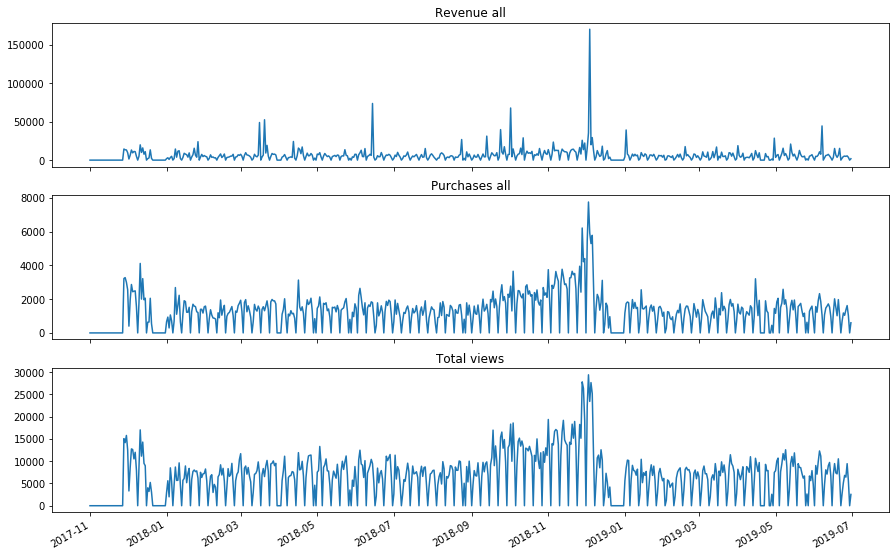

In [16]:
import datetime 

fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))
ax1.plot(pd.to_datetime(all_ts_df['date']), all_ts_df['revenue'])
ax1.set_title('Revenue all')
ax2.plot(pd.to_datetime(all_ts_df['date']), all_ts_df['purchases'])
ax2.set_title('Purchases all')
ax3.plot(pd.to_datetime(all_ts_df['date']), all_ts_df['total_views'])
ax3.set_title('Total views')

fig1.autofmt_xdate()

plt.show()

### Revenue by Country

In [17]:

result_s = df_aavail_data.groupby(['country'])['price'].agg('sum')
result_sorted = result_s.sort_values(ascending=False)
result_sorted = result_sorted[:10]
result_sorted


country
United Kingdom    3.658066e+06
EIRE              1.070692e+05
Germany           4.927182e+04
France            4.056514e+04
Norway            3.849475e+04
Spain             1.604099e+04
Hong Kong         1.445257e+04
Portugal          1.352867e+04
Singapore         1.317592e+04
Netherlands       1.232280e+04
Name: price, dtype: float64

[Text(0, 0.5, 'Revenue')]

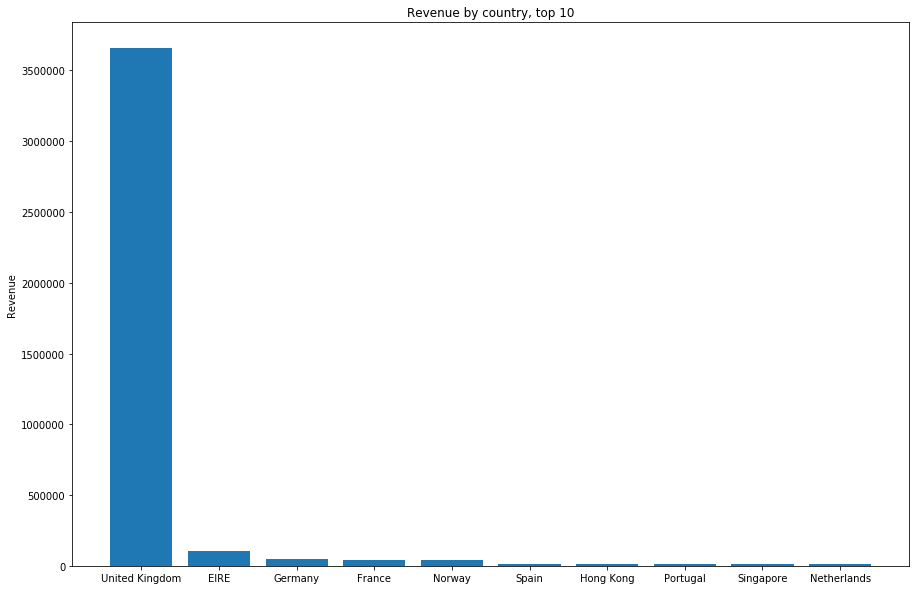

In [18]:

fig2, (ax21) = plt.subplots(1, 1, figsize=(15, 10))
ax21.bar(result_sorted.index, result_sorted.values)
ax21.set_title('Revenue by country, top 10')
ax21.set(ylabel='Revenue')

In [40]:
all_columns = ['purchases', 'unique_invoices', 'unique_streams', 'total_views', 'revenue']

In [42]:
corr = all_ts_df[all_columns].corr()
corr

,purchases,unique_invoices,unique_streams,total_views,revenue
purchases,1.000000,0.820700,0.904121,0.963792,0.575842
unique_invoices,0.820700,1.000000,0.883705,0.873395,0.454396
unique_streams,0.904121,0.883705,1.000000,0.907361,0.472225
total_views,0.963792,0.873395,0.907361,1.000000,0.537586
revenue,0.575842,0.454396,0.472225,0.537586,1.000000


In [44]:
create_correlation_grid_plot(df=all_ts_df, columns=all_columns, title='Correlations')

TypeError: 'float' object cannot be interpreted as an integer

In [5]:
df_aavail_data.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [8]:
df_aavail_data.describe(include='all')  

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
count,815011,625249.000000,815011.000000,815011,815011.000000,815011.000000,815011,815011.000000,815011.000000,815011
unique,43,NaN,NaN,42646,NaN,NaN,5007,NaN,NaN,495
top,United Kingdom,NaN,NaN,537434,NaN,NaN,85123A,NaN,NaN,2018-12-03 00:00:00
freq,751228,NaN,NaN,1350,NaN,NaN,5017,NaN,NaN,7756
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 00:00:00
mean,NaN,15333.415068,15.064819,NaN,6.592718,4.802631,NaN,5.231106,2018.247654,NaN
std,NaN,1698.360788,8.788845,NaN,3.598781,135.058707,NaN,5.109982,0.545261,NaN
min,NaN,12346.000000,1.000000,NaN,1.000000,-53594.360000,NaN,0.000000,2017.000000,NaN
25%,NaN,13956.000000,7.000000,NaN,3.000000,1.250000,NaN,1.000000,2018.000000,NaN


In [22]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df_aavail_data.isnull().sum(axis = 0))

Missing Value Summary
-----------------------------------
country              0
customer_id     189759
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64


<BarContainer object of 10 artists>

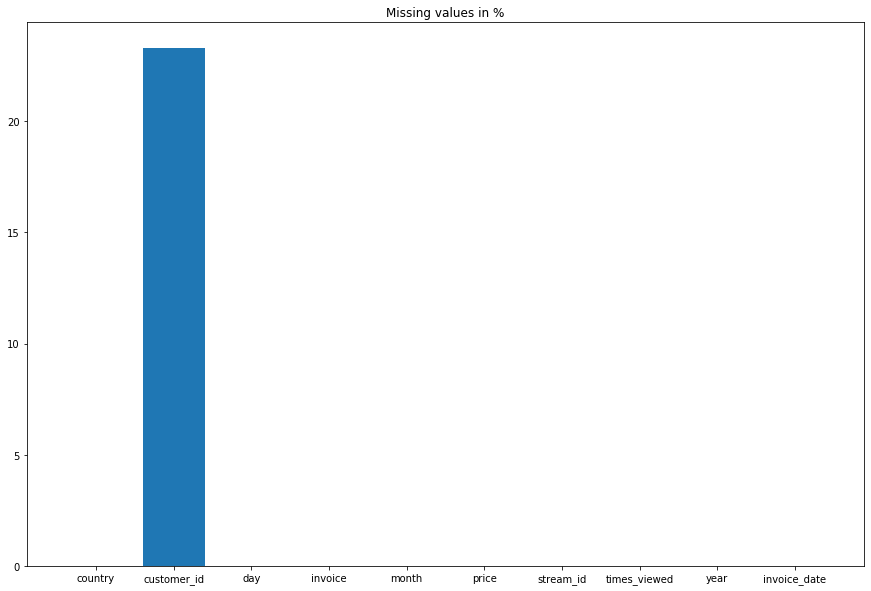

In [38]:
missing_values_perc = df_aavail_data.isnull().sum(axis=0)*100/len(df_aavail_data)
plt.rcParams["figure.figsize"] = (15, 10)
plt.title(label="Missing values in %")
plt.bar(missing_values_perc.index, missing_values_perc.values)

In [11]:
country_list=df_aavail_data['country'].unique().tolist()
country_list

['United Kingdom',
 'France',
 'USA',
 'Belgium',
 'Australia',
 'EIRE',
 'Germany',
 'Portugal',
 'Japan',
 'Denmark',
 'Nigeria',
 'Netherlands',
 'Poland',
 'Spain',
 'Channel Islands',
 'Italy',
 'Cyprus',
 'Greece',
 'Norway',
 'Austria',
 'Sweden',
 'United Arab Emirates',
 'Finland',
 'Switzerland',
 'Unspecified',
 'Malta',
 'Bahrain',
 'RSA',
 'Bermuda',
 'Hong Kong',
 'Singapore',
 'Thailand',
 'Israel',
 'Lithuania',
 'West Indies',
 'Lebanon',
 'Korea',
 'Brazil',
 'Canada',
 'Iceland',
 'Saudi Arabia',
 'Czech Republic',
 'European Community']

In [15]:
ts_df = pd.read_csv("./data/cs-train/ts-all.csv")

FileNotFoundError: [Errno 2] File b'./data/cs-train/ts-all.csv' does not exist: b'./data/cs-train/ts-all.csv'

In [9]:
df_USA = df_aavail_data.loc[df_aavail_data['country_name']=='united_states']
df_singapore = df_aavail_data.loc[df_aavail_data['country_name']=='singapore']

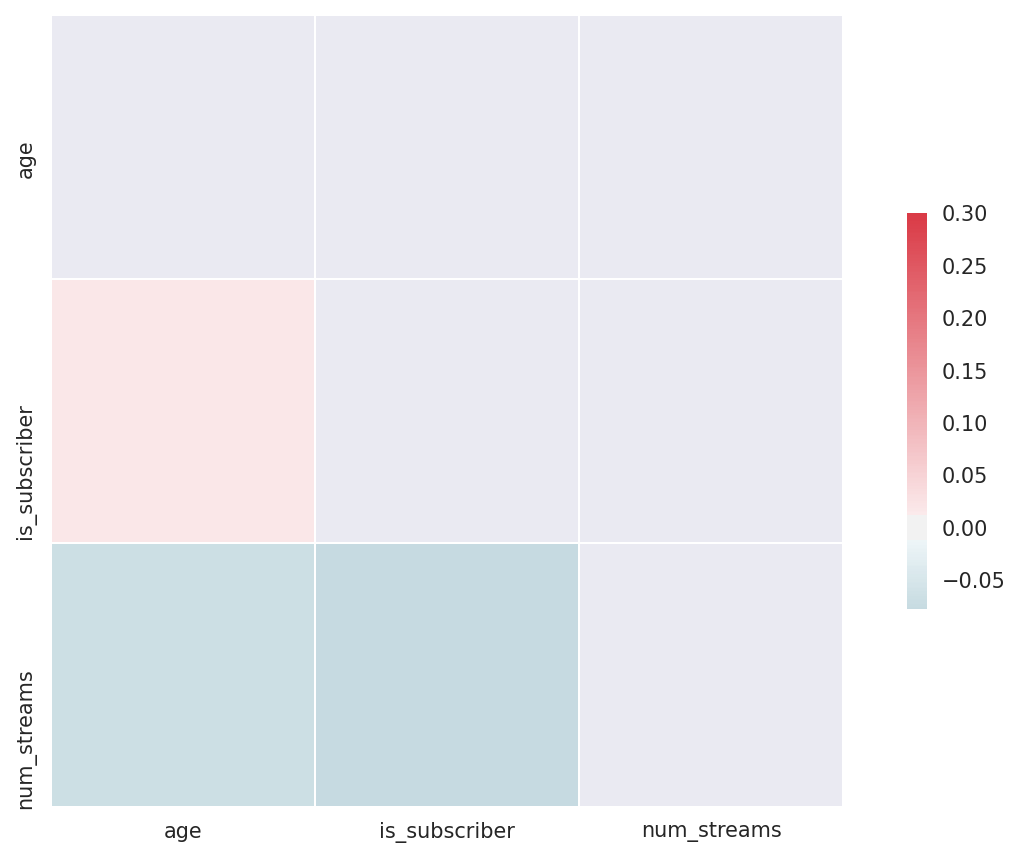

In [13]:
create_correlation_grid_plot(df_USA, ['age', 'is_subscriber', 'num_streams'], '')

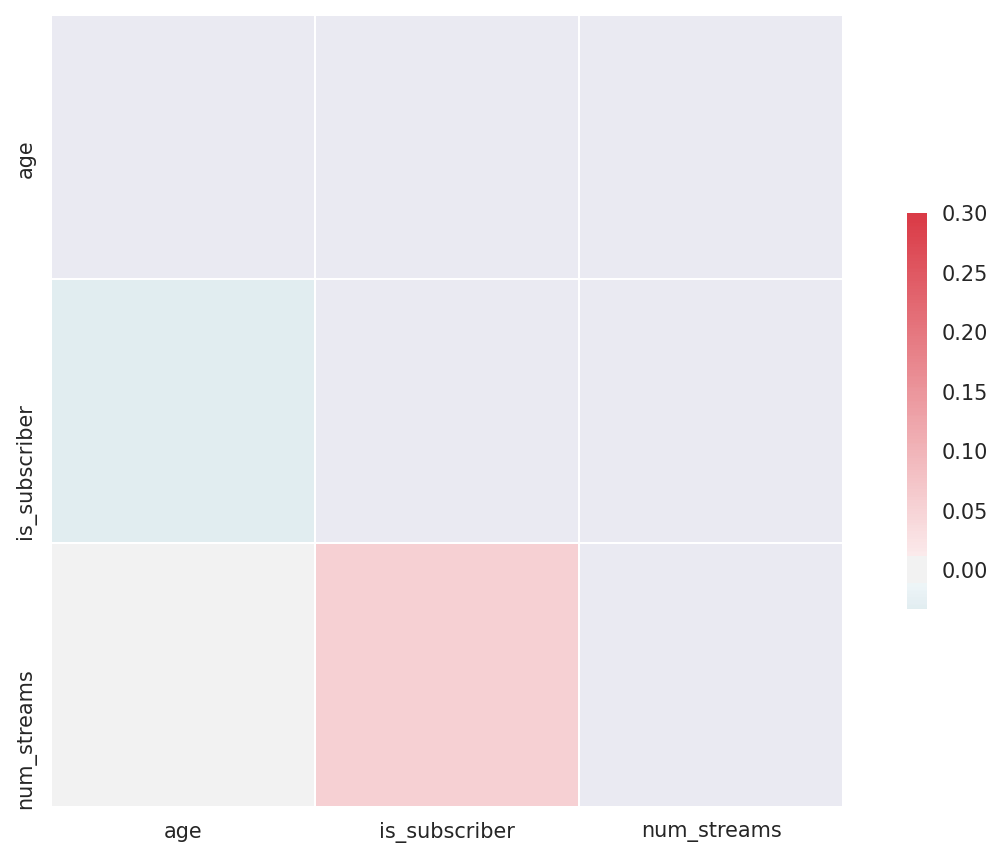

In [14]:
create_correlation_grid_plot(df_singapore, ['age', 'is_subscriber', 'num_streams'], '')

In [15]:
df_USA.describe(include='all')

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
count,700.000000,700,700.000000,700,700,649,676.000000
unique,NaN,1,NaN,700,2,3,NaN
top,NaN,united_states,NaN,Diego Mueller,True,aavail_premium,NaN
freq,NaN,700,NaN,1,592,232,NaN
mean,498.297143,NaN,27.711429,NaN,NaN,NaN,18.853550
std,292.087867,NaN,9.114414,NaN,NaN,NaN,4.200617
min,1.000000,NaN,14.000000,NaN,NaN,NaN,2.000000
25%,244.750000,NaN,21.000000,NaN,NaN,NaN,17.000000
50%,500.500000,NaN,24.000000,NaN,NaN,NaN,20.000000
75%,755.250000,NaN,34.000000,NaN,NaN,NaN,22.000000


In [16]:
df_singapore.describe(include='all')

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
count,300.000000,300,300.000000,300,300,279,278.000000
unique,NaN,1,NaN,300,2,3,NaN
top,NaN,singapore,NaN,Wilson Henson,False,aavail_basic,NaN
freq,NaN,300,NaN,1,181,109,NaN
mean,505.640000,NaN,27.113333,NaN,NaN,NaN,15.172662
std,281.458915,NaN,9.134840,NaN,NaN,NaN,5.006030
min,2.000000,NaN,14.000000,NaN,NaN,NaN,1.000000
25%,259.750000,NaN,21.000000,NaN,NaN,NaN,12.000000
50%,500.500000,NaN,23.000000,NaN,NaN,NaN,16.000000
75%,734.250000,NaN,33.000000,NaN,NaN,NaN,19.000000


In [17]:
df_s_s = df_singapore.loc[df_singapore['is_subscriber'] == True]
df_s_ns = df_singapore.loc[df_singapore['is_subscriber'] == False]
df_USA_s = df_USA.loc[df_USA['is_subscriber'] == True]
df_USA_ns = df_USA.loc[df_USA['is_subscriber'] == False]


In [21]:
df_result = df_aavail_data.copy()

In [19]:
nr_s_s = round(df_s_s['num_streams'].mean(), 0)
nr_s_ns = round(df_s_ns['num_streams'].mean(), 0)
nr_u_s = round(df_USA_s['num_streams'].mean(), 0)
nr_u_ns = round(df_USA_ns['num_streams'].mean(), 0)
t_s_s = 'aavail_basic'
t_s_ns = 'aavail_unlimited'
t_u_s ='aavail_basic'
t_u_ns = 'aavail_premium'

nr_s_s, nr_s_ns, nr_u_s, nr_u_ns

(16.0, 15.0, 19.0, 20.0)

In [20]:
v1 = {'subscriber_type': t_s_s, 'num_streams': nr_s_s}
v2 = {'subscriber_type': t_s_ns, 'num_streams': nr_s_ns}
v3 = {'subscriber_type': t_u_s, 'num_streams': nr_u_s}
v4 = {'subscriber_type': t_u_ns, 'num_streams': nr_u_ns}
df_s_s_r = df_s_s.fillna(value=v1)
df_s_ns_r = df_s_ns.fillna(value=v2)
df_USA_s_r = df_USA_s.fillna(value=v3)
df_USA_ns_r = df_USA_ns.fillna(value=v4)

In [22]:
df_result_2 = pd.concat([df_s_s_r, df_s_ns_r, df_USA_s_r, df_USA_ns_r])

In [23]:
df_result_2.describe(include='all')

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000
unique,NaN,2,NaN,1000,2,3,NaN
top,NaN,united_states,NaN,Diego Mueller,True,aavail_basic,NaN
freq,NaN,700,NaN,1,711,386,NaN
mean,500.500000,NaN,27.532000,NaN,NaN,NaN,17.759000
std,288.819436,NaN,9.120096,NaN,NaN,NaN,4.659467
min,1.000000,NaN,14.000000,NaN,NaN,NaN,1.000000
25%,250.750000,NaN,21.000000,NaN,NaN,NaN,15.000000
50%,500.500000,NaN,24.000000,NaN,NaN,NaN,19.000000
75%,750.250000,NaN,33.000000,NaN,NaN,NaN,21.000000


In [26]:
project.save_data(file_name = "imputed_data.csv",data = df_result_2.to_csv(index=False))

{'file_name': 'imputed_data.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'dataanalysisandhypothesistestingc-donotdelete-pr-v62gpcgrtbkdwv',
 'asset_id': '244231fa-57c4-4f4d-ab00-a641b746cca5'}

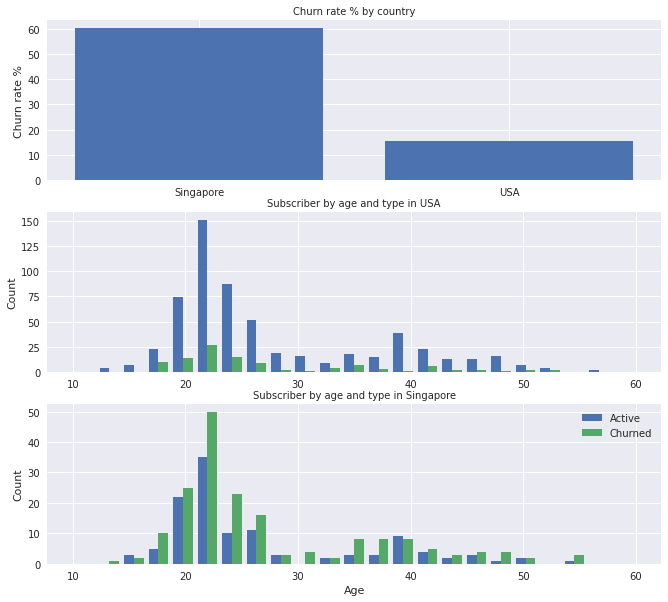

In [27]:
plt.style.use('seaborn-deep')
df_result_USA = df_result_2.loc[df_result_2['country_name']=='united_states']
df_result_singapore = df_result_2.loc[df_result_2['country_name']=='singapore']

age_s_USA = df_result_USA.loc[df_result_USA['is_subscriber'] == True]['age'];
age_ns_USA = df_result_USA.loc[df_result_USA['is_subscriber'] == False]['age'];
age_s_S = df_result_singapore.loc[df_result_singapore['is_subscriber'] == True]['age'];
age_ns_S = df_result_singapore.loc[df_result_singapore['is_subscriber'] == False]['age'];
                                        
charn_rate_usa = len(age_ns_USA)/len(df_result_USA)
charn_rate_s = len(age_ns_S)/len(df_result_singapore)
charn_rate_s, charn_rate_usa

bins = np.linspace(10, 60, 24)

fig6, (ax3, ax1, ax2) = plt.subplots(3, 1, figsize=(11,10))
# plt.bar(['Singapore', 'USA'], [charn_rate_s*100, charn_rate_usa*100])
ax3.bar(['Singapore', 'USA'], [charn_rate_s*100, charn_rate_usa*100])
ax3.set_title('Churn rate % by country')
ax3.set(ylabel='Churn rate %')
# fig6.suptitle()
ax1.hist([age_s_USA, age_ns_USA], bins, label=['Active', 'Churned'])
ax1.set_title('Subscriber by age and type in USA')
ax1.set(ylabel='Count')
ax2.hist([age_s_S, age_ns_S], bins, label=['Active', 'Churned'])
ax2.set_title('Subscriber by age and type in Singapore')
ax2.set(xlabel='Age', ylabel='Count')
plt.legend(loc='upper right')
plt.show()

In [29]:
charn_rate_usa = len(age_ns_USA)/len(df_result_USA)
charn_rate_s = len(age_ns_S)/len(df_result_singapore)
charn_rate_s, charn_rate_usa


(0.6033333333333334, 0.15428571428571428)

<BarContainer object of 2 artists>

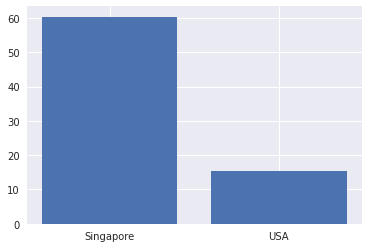

In [30]:
plt.bar(['Singapore', 'USA'], [charn_rate_s*100, charn_rate_usa*100])

In [120]:
df_USA_ns.describe(include='all')

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
count,108.000000,108,108.000000,108,108,108,107.000000
unique,NaN,1,NaN,108,1,4,NaN
top,NaN,united_states,NaN,Josue Casey,False,aavail_premium,NaN
freq,NaN,108,NaN,1,108,39,NaN
mean,468.629630,NaN,27.342593,NaN,NaN,NaN,19.607477
std,296.141877,NaN,9.079259,NaN,NaN,NaN,4.041663
min,3.000000,NaN,17.000000,NaN,NaN,NaN,5.000000
25%,194.250000,NaN,21.000000,NaN,NaN,NaN,18.000000
50%,446.000000,NaN,24.000000,NaN,NaN,NaN,20.000000
75%,748.000000,NaN,33.000000,NaN,NaN,NaN,22.000000


In [99]:
df_result.head(30)

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


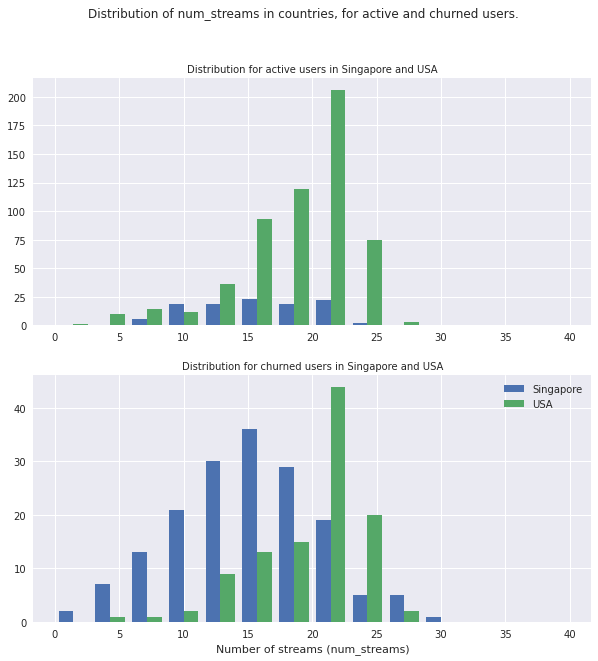

In [53]:
#ax = df_s_s['num_streams'].plot(kind='hist')
#df_s_ns['num_streams'].plot(kind='hist', ax=ax)


plt.style.use('seaborn-deep')
#fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize=(10,10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('Distribution of num_streams in countries, for active and churned users.')
#ax1.plot(x, y)
#ax2.plot(x, -y)

sub_streams_s = df_s_s['num_streams'];
no_sub_streams_s = df_s_ns['num_streams'];
sub_streams_usa = df_USA_s['num_streams'];
no_sub_streams_usa = df_USA_ns['num_streams'];
bins = np.linspace(0, 40, 15)

ax1.hist([sub_streams_s, sub_streams_usa], bins, label=['Singapore', 'USA'])
ax1.set_title('Distribution for active users in Singapore and USA')
# ax1.set(xlabel='Number of streams (num_streams)')
ax2.hist([no_sub_streams_s, no_sub_streams_usa], bins, label=['Singapore', 'USA'])
ax2.set_title('Distribution for churned users in Singapore and USA')
ax2.set(xlabel='Number of streams (num_streams)')
plt.legend(loc='upper right')
plt.show()


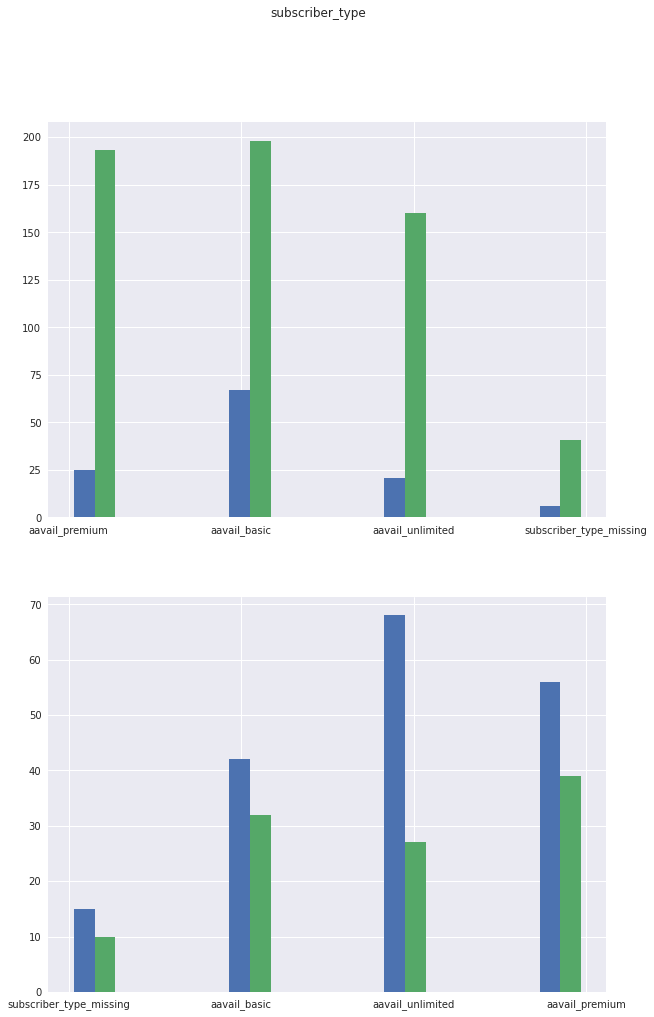

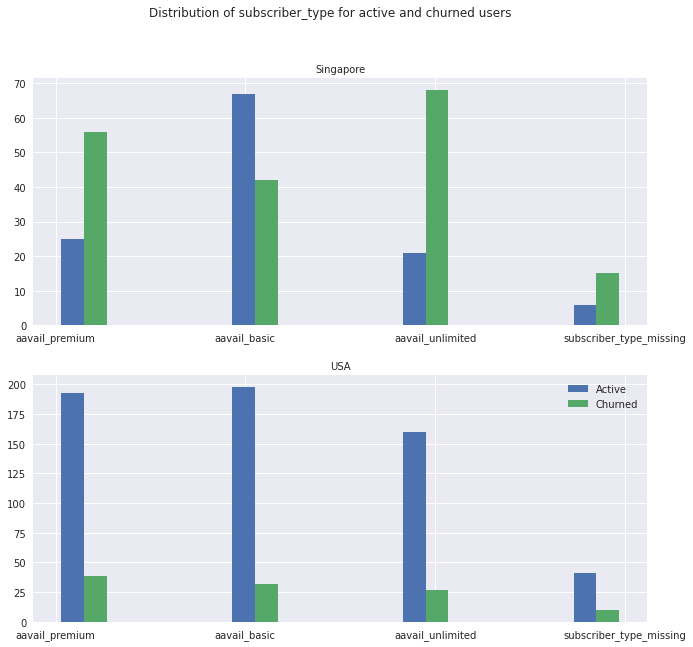

In [50]:
#ax = df_s_s['num_streams'].plot(kind='hist')
#df_s_ns['num_streams'].plot(kind='hist', ax=ax)

#subscription type

# plt.style.use('seaborn-deep')
#fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize=(10,10))
fig3, (ax5, ax6) = plt.subplots(2, 1, figsize=(10,16))
fig3.suptitle('subscriber_type')
#ax1.plot(x, y)
#ax2.plot(x, -y)
values = {'subscriber_type': 'subscriber_type_missing'}
df_s_s = df_s_s.fillna(value=values)
df_s_ns = df_s_ns.fillna(value=values)
df_USA_s = df_USA_s.fillna(value=values)
df_USA_ns = df_USA_ns.fillna(value=values)

sub_stype_s = df_s_s['subscriber_type'];
no_sub_stype_s = df_s_ns['subscriber_type'];
sub_stype_usa = df_USA_s['subscriber_type'];
no_sub_stype_usa = df_USA_ns['subscriber_type'];
bins = np.linspace(0, 40, 15)

ax5.hist([sub_stype_s, sub_stype_usa], label=['Singapore active', 'USA active'])
ax6.hist([no_sub_stype_s, no_sub_stype_usa], label=['Singapore churned', 'USA churned'])

plt.style.use('seaborn-deep')
fig4, (ax7, ax8) = plt.subplots(2, 1, figsize=(11,10))
fig4.suptitle('Distribution of subscriber_type for active and churned users')
ax7.hist([sub_stype_s, no_sub_stype_s], label=['Active', 'Churned'])
ax7.set_title('Singapore')
ax8.hist([sub_stype_usa, no_sub_stype_usa], label=['Active', 'Churned'])
ax8.set_title('USA')
plt.legend(loc='upper right')
plt.show()

In [31]:
df = df_aavail_data.copy()

In [32]:
values = {'subscriber_type': 'subscriber_type_missing'}
df = df.fillna(value=values)

In [33]:
df.isnull().sum(axis=0)

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type     0
num_streams        46
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

## one hot encode the subscriber
ohe1 = OneHotEncoder()
column = df['subscriber_type'].values.reshape(-1,1)
ohe1.fit(column)
labels1 = ohe1.categories_[0].tolist()
X1 = ohe1.transform(column).toarray()
## one hot encode the country
ohe2 = OneHotEncoder()
column = df['country_name'].values.reshape(-1,1)
ohe2.fit(column)
labels2 = ohe2.categories_[0].tolist()
X2 = ohe2.transform(column).toarray()
## concat all of the data
#labels = ['customer_id','age','customer_name', 'is_subscriber', 'num_streams']
labels = ['age', 'is_subscriber', 'num_streams']
X = df.loc[:,labels].to_numpy()
labels = labels + labels1 + labels2
X = np.hstack([X,X1,X2])
df1 = pd.DataFrame({label:X[:,i] for i,label in enumerate(labels)})
df1.head()

,age,is_subscriber,num_streams,aavail_basic,aavail_premium,aavail_unlimited,subscriber_type_missing,singapore,united_states
0,21,True,23,0,1,0,0,0,1
1,31,False,12,0,0,0,1,1,0
2,22,False,22,0,1,0,0,0,1
3,21,True,19,1,0,0,0,0,1
4,22,True,23,0,1,0,0,1,0


In [35]:
data_types = { 'age': 'float64', 'is_subscriber': 'bool', 'num_streams': 'float64', 'aavail_basic': 'bool', 'aavail_premium': 'bool', 'aavail_unlimited': 'bool', 'subscriber_type_missing': 'bool', 'singapore': 'bool', 'united_states': 'bool' }
df2 = df1.astype(data_types)

In [36]:
df2.dtypes

age                        float64
is_subscriber                 bool
num_streams                float64
aavail_basic                  bool
aavail_premium                bool
aavail_unlimited              bool
subscriber_type_missing       bool
singapore                     bool
united_states                 bool
dtype: object

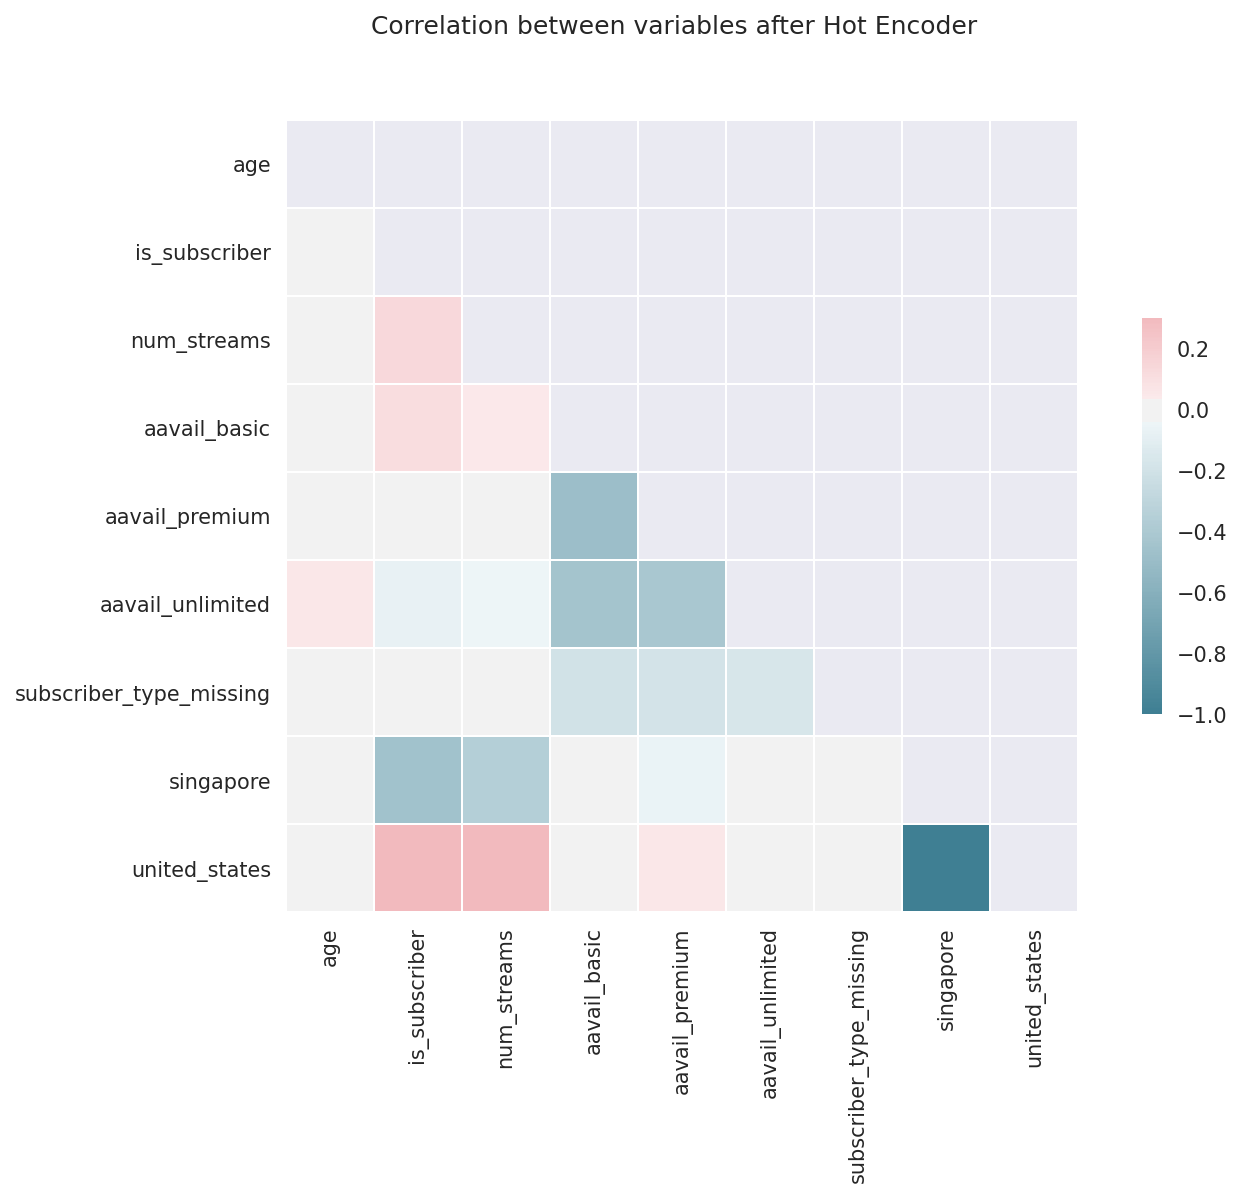

In [37]:
create_correlation_grid_plot(df2, ['age', 'is_subscriber', 'num_streams', 'aavail_basic', 'aavail_premium', 'aavail_unlimited', 'subscriber_type_missing', 'singapore', 'united_states'], 'Correlation between variables after Hot Encoder')